In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import pickle

In [13]:
file_path = 'extended_dataset.csv'
dataset = pd.read_csv(file_path)

# Drop unnecessary columns
dataset = dataset.drop(columns=[col for col in dataset.columns if 'Unnamed' in col or col == 'ID'])

dataset.head()

,Price,Square Footage,Bedrooms,Bathrooms,Floors,Garage,Pool,Central Air,Heating Type,Distance to City Center,Crime Rate,Property Tax,Previous Sale Price,Age of Property,Nearby Schools Rating
0,1.646963e+07,5329.872999,4.030309,0.974815,1.006286,1.002398,No,Yes,Central,49.597995,Low,29000.998551,5.907174e+06,55.463852,2.001489
1,1.333770e+07,3228.588918,2.995107,1.002128,2.993409,-0.007795,Yes,Yes,Electric,19.840010,Medium,8890.903802,1.211065e+06,96.986533,1.021803
2,2.646354e+06,3558.135387,4.013908,3.977012,1.998151,1.977444,Yes,Yes,Gas,36.521613,High,9429.036854,3.763227e+06,18.679751,4.988976
3,1.471677e+07,3119.628267,2.996323,2.006344,0.989519,1.012304,No,Yes,NaN,34.469851,High,15038.120332,6.675790e+06,76.383052,5.072069
4,9.893225e+06,3137.864242,3.009452,1.977760,2.970013,1.009871,No,Yes,Central,10.751389,Medium,48037.706241,1.507776e+07,65.016149,4.005435


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    5000 non-null   float64
 1   Square Footage           5000 non-null   float64
 2   Bedrooms                 5000 non-null   float64
 3   Bathrooms                5000 non-null   float64
 4   Floors                   5000 non-null   float64
 5   Garage                   5000 non-null   float64
 6   Pool                     5000 non-null   object 
 7   Central Air              5000 non-null   object 
 8   Heating Type             3785 non-null   object 
 9   Distance to City Center  5000 non-null   float64
 10  Crime Rate               5000 non-null   object 
 11  Property Tax             5000 non-null   float64
 12  Previous Sale Price      5000 non-null   float64
 13  Age of Property          5000 non-null   float64
 14  Nearby Schools Rating   

In [15]:
dataset.describe()

,Price,Square Footage,Bedrooms,Bathrooms,Floors,Garage,Distance to City Center,Property Tax,Previous Sale Price,Age of Property,Nearby Schools Rating
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,9.828515e+06,5195.974100,3.548378,2.483054,2.000124,1.028309,24.831850,24993.448531,1.033042e+07,51.337573,3.019026
std,5.839718e+06,2857.454281,1.721123,1.137018,0.831444,0.825895,14.342194,14007.222367,5.444621e+06,27.788953,1.451415
min,-2.628121e+05,246.334210,0.728154,0.801715,0.823866,-0.079624,-0.123244,338.870718,-1.417543e+05,2.482826,0.800664
25%,4.370672e+06,2599.049125,2.003418,1.081888,1.025467,0.013766,12.169313,13222.417543,5.772541e+06,27.031024,1.947929
50%,1.013772e+07,5033.193970,3.913056,2.885239,2.000598,1.002502,24.763706,25090.019682,1.011625e+07,52.477199,2.996905
75%,1.502983e+07,7722.503458,5.011139,3.173489,2.974736,1.988822,37.504408,37557.233804,1.509820e+07,72.968270,4.066820
max,2.023180e+07,10185.962601,6.248190,4.167488,3.145866,2.074458,51.124183,50865.391648,2.046941e+07,101.567688,5.248584


In [25]:
dataset.isna().sum()

,0
Price,0
Square Footage,0
Bedrooms,0
Bathrooms,0
Floors,0
Garage,0
Pool,0
Central Air,0
Heating Type,0
Distance to City Center,0


In [26]:
dataset.columns

Index(['Price', 'Square Footage', 'Bedrooms', 'Bathrooms', 'Floors', 'Garage',
       'Pool', 'Central Air', 'Heating Type', 'Distance to City Center',
       'Crime Rate', 'Property Tax', 'Previous Sale Price'],
      dtype='object')

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    5000 non-null   float64
 1   Square Footage           5000 non-null   float64
 2   Bedrooms                 5000 non-null   float64
 3   Bathrooms                5000 non-null   float64
 4   Floors                   5000 non-null   float64
 5   Garage                   5000 non-null   float64
 6   Pool                     5000 non-null   object 
 7   Central Air              5000 non-null   object 
 8   Heating Type             3785 non-null   object 
 9   Distance to City Center  5000 non-null   float64
 10  Crime Rate               5000 non-null   object 
 11  Property Tax             5000 non-null   float64
 12  Previous Sale Price      5000 non-null   float64
dtypes: float64(9), object(4)
memory usage: 507.9+ KB


##Label Encoding for Categorical Columns

In [23]:
from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()

categorical_columns = ['Pool', 'Central Air', 'Heating Type', 'Crime Rate']
for col in categorical_columns:
    dataset[col] = labelencoder.fit_transform(dataset[col])

dataset.head()

,Price,Square Footage,Bedrooms,Bathrooms,Floors,Garage,Pool,Central Air,Heating Type,Distance to City Center,Crime Rate,Property Tax,Previous Sale Price
0,1.646963e+07,5329.872999,4.030309,0.974815,1.006286,1.002398,0,1,0,49.597995,1,29000.998551,5.907174e+06
1,1.333770e+07,3228.588918,2.995107,1.002128,2.993409,-0.007795,1,1,1,19.840010,2,8890.903802,1.211065e+06
2,2.646354e+06,3558.135387,4.013908,3.977012,1.998151,1.977444,1,1,2,36.521613,0,9429.036854,3.763227e+06
3,1.471677e+07,3119.628267,2.996323,2.006344,0.989519,1.012304,0,1,3,34.469851,0,15038.120332,6.675790e+06
4,9.893225e+06,3137.864242,3.009452,1.977760,2.970013,1.009871,0,1,0,10.751389,2,48037.706241,1.507776e+07


In [29]:
##Filling the null values in the heating type
dataset['Heating Type'].fillna(dataset['Heating Type'].mode()[0], inplace=True)

<ipython-input-29-889e512a98ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Heating Type'].fillna(dataset['Heating Type'].mode()[0], inplace=True)


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    5000 non-null   float64
 1   Square Footage           5000 non-null   float64
 2   Bedrooms                 5000 non-null   float64
 3   Bathrooms                5000 non-null   float64
 4   Floors                   5000 non-null   float64
 5   Garage                   5000 non-null   float64
 6   Pool                     5000 non-null   int64  
 7   Central Air              5000 non-null   int64  
 8   Heating Type             5000 non-null   int64  
 9   Distance to City Center  5000 non-null   float64
 10  Crime Rate               5000 non-null   int64  
 11  Property Tax             5000 non-null   float64
 12  Previous Sale Price      5000 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 507.9 KB


##Handeling Numerical Values
#Checking For outliers


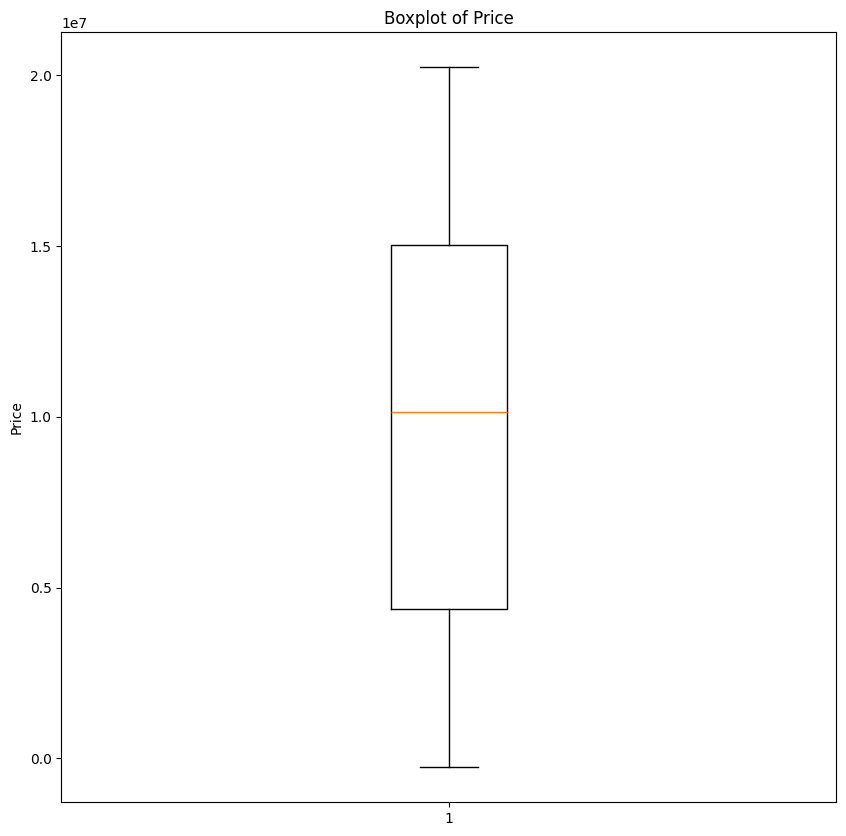

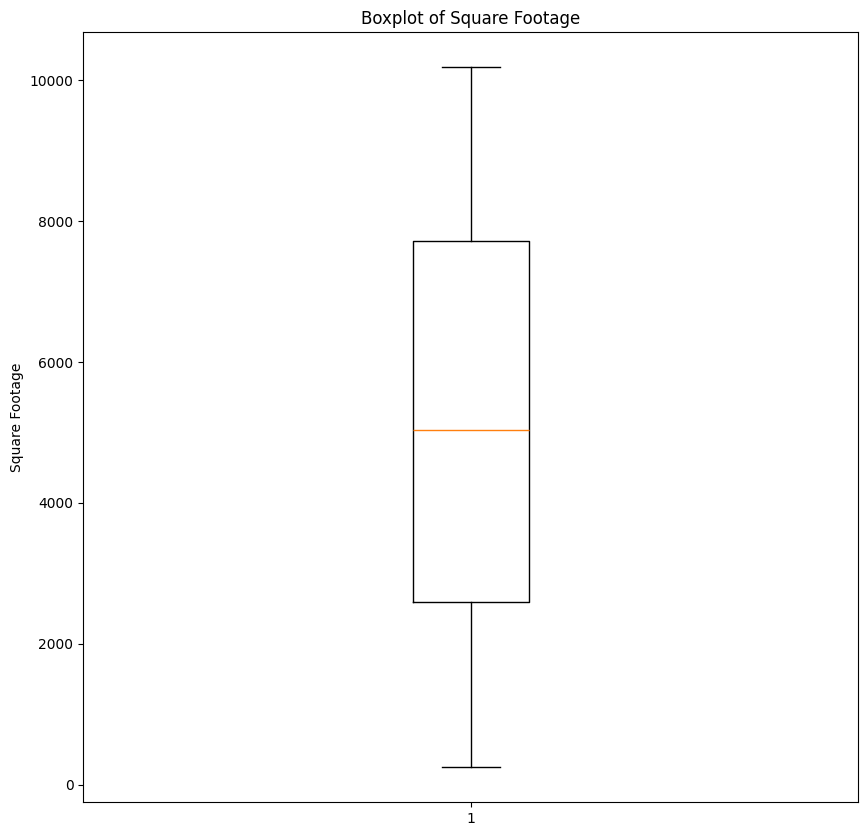

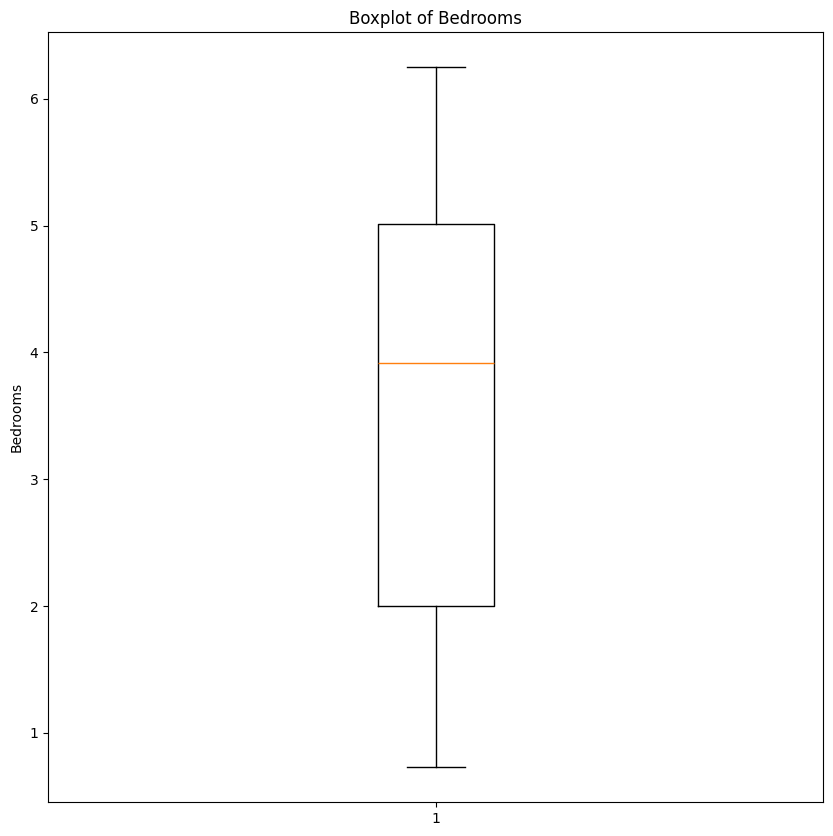

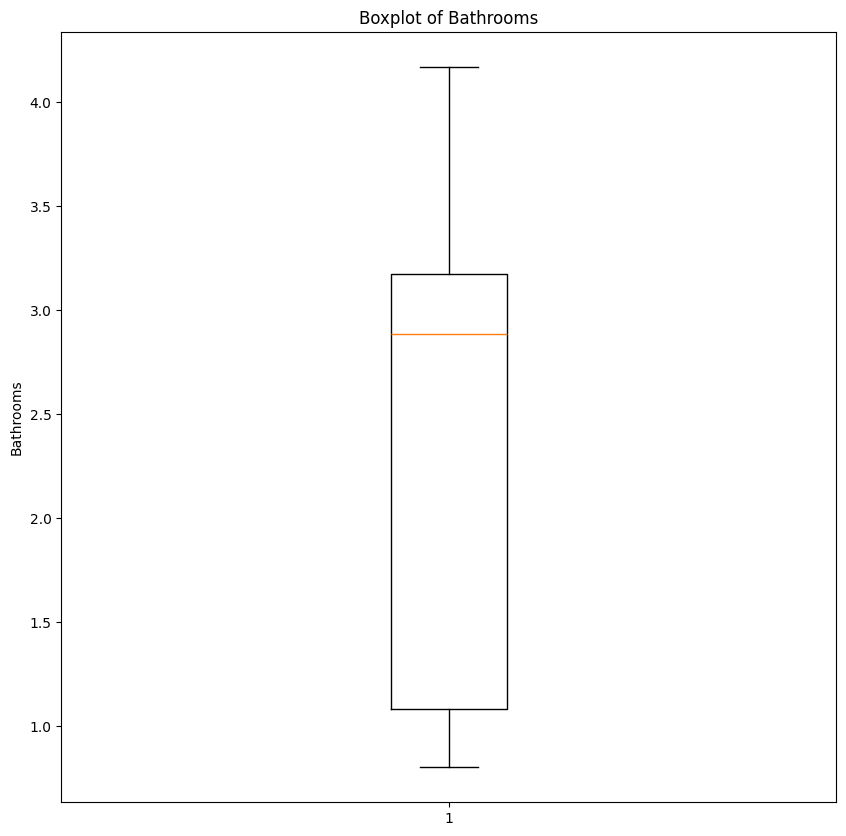

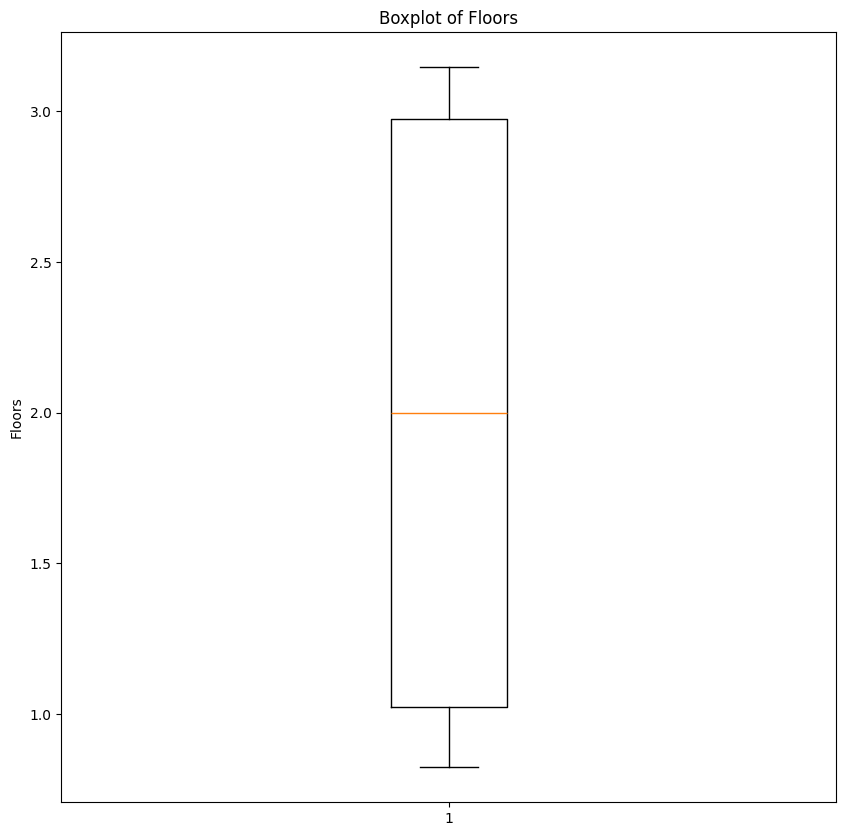

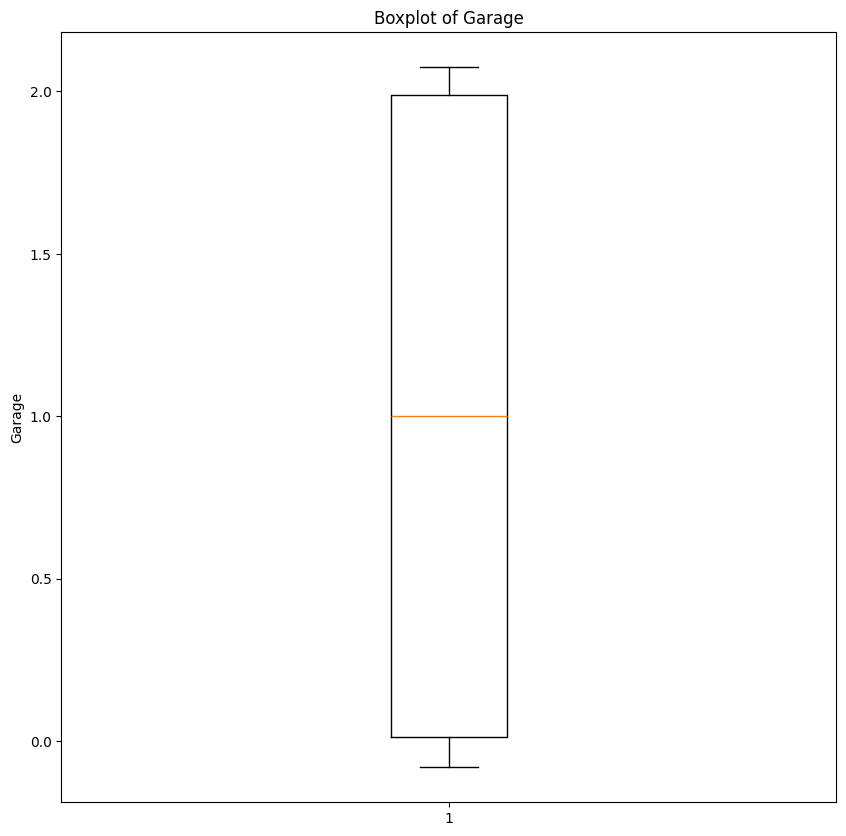

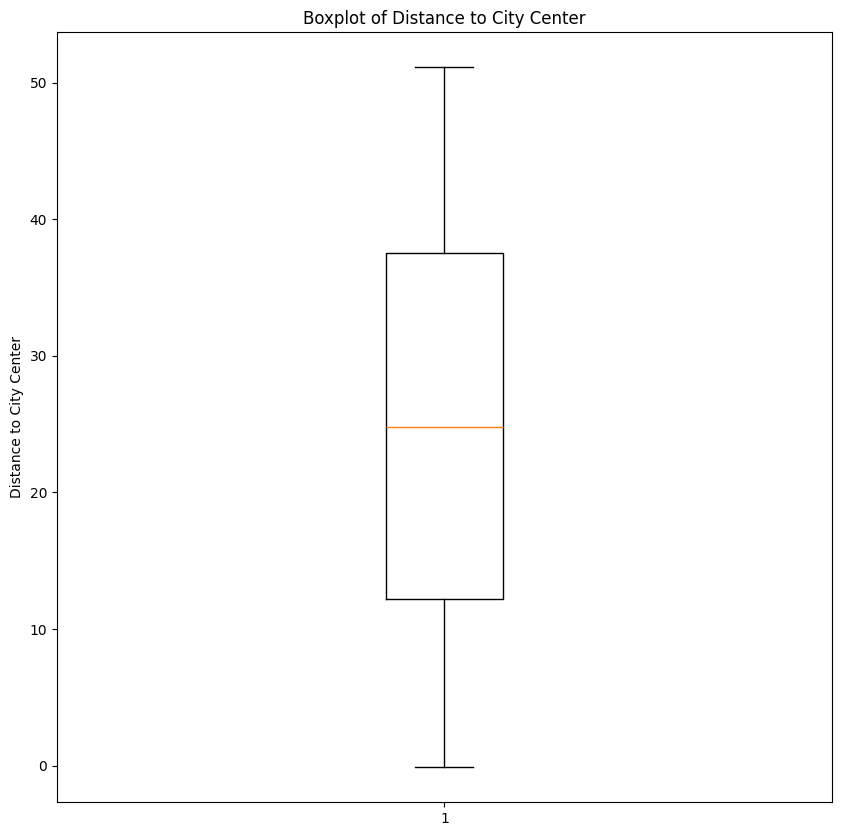

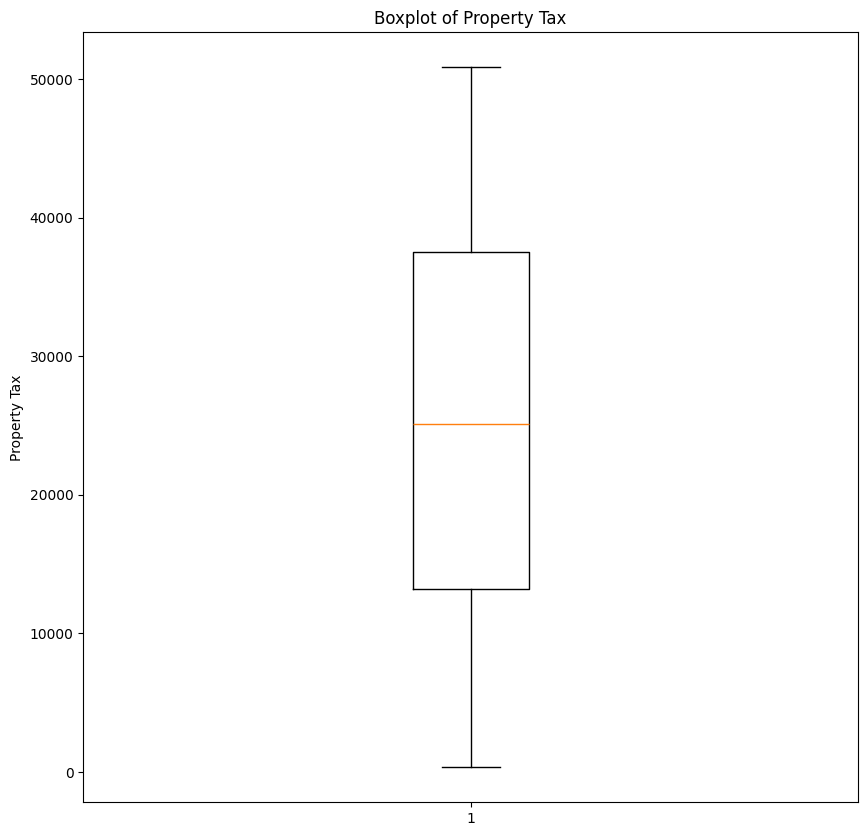

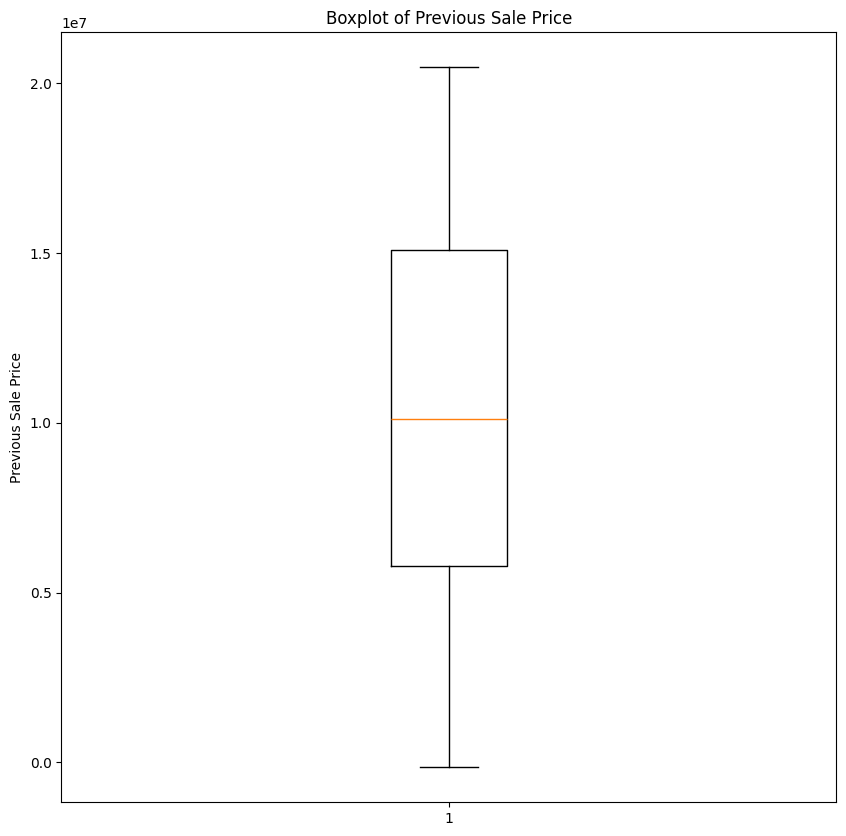

In [31]:
import matplotlib.pyplot as plt


numerical_columns = ['Price', 'Square Footage', 'Bedrooms', 'Bathrooms', 'Floors', 'Garage', 'Distance to City Center', 'Property Tax', 'Previous Sale Price']

for col in numerical_columns:
  plt.figure(figsize=(10, 10))
  plt.title(f'Boxplot of {col}')
  plt.boxplot(dataset[col])
  plt.ylabel(col)
  plt.show()


##Handling Outliers if any

In [32]:
z = StandardScaler().fit_transform(dataset[numerical_columns])
abs_z_scores = abs(z)

# Filter for outliers (adjust threshold as needed)
threshold = 3
outliers = (abs_z_scores > threshold).any(axis=1)

# Drop rows with outliers
dataset = dataset[~outliers]
dataset.head()

,Price,Square Footage,Bedrooms,Bathrooms,Floors,Garage,Pool,Central Air,Heating Type,Distance to City Center,Crime Rate,Property Tax,Previous Sale Price
0,1.646963e+07,5329.872999,4.030309,0.974815,1.006286,1.002398,0,1,0,49.597995,1,29000.998551,5.907174e+06
1,1.333770e+07,3228.588918,2.995107,1.002128,2.993409,-0.007795,1,1,1,19.840010,2,8890.903802,1.211065e+06
2,2.646354e+06,3558.135387,4.013908,3.977012,1.998151,1.977444,1,1,2,36.521613,0,9429.036854,3.763227e+06
3,1.471677e+07,3119.628267,2.996323,2.006344,0.989519,1.012304,0,1,3,34.469851,0,15038.120332,6.675790e+06
4,9.893225e+06,3137.864242,3.009452,1.977760,2.970013,1.009871,0,1,0,10.751389,2,48037.706241,1.507776e+07


In [33]:
##Scaling the numerical columns to a specific range with Standarad Scaler

scale_columns = [ 'Square Footage','Distance to City Center', 'Property Tax', 'Previous Sale Price']
scaler = StandardScaler()
dataset[scale_columns] = scaler.fit_transform(dataset[scale_columns])
dataset.head()

,Price,Square Footage,Bedrooms,Bathrooms,Floors,Garage,Pool,Central Air,Heating Type,Distance to City Center,Crime Rate,Property Tax,Previous Sale Price
0,1.646963e+07,0.046864,4.030309,0.974815,1.006286,1.002398,0,1,0,1.726976,1,0.286135,-0.812487
1,1.333770e+07,-0.688579,2.995107,1.002128,2.993409,-0.007795,1,1,1,-0.348088,2,-1.149704,-1.675096
2,2.646354e+06,-0.573238,4.013908,3.977012,1.998151,1.977444,1,1,2,0.815143,0,-1.111282,-1.206300
3,1.471677e+07,-0.726715,2.996323,2.006344,0.989519,1.012304,0,1,3,0.672070,0,-0.710799,-0.671303
4,9.893225e+06,-0.720332,3.009452,1.977760,2.970013,1.009871,0,1,0,-0.981849,2,1.645334,0.872020


##Training The model

In [34]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##Model Prediction

In [41]:
from sklearn.metrics import mean_squared_error

y_pred = model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1033857724925.135


In [43]:
accuracy = model_rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9682275603262848


##Testing With linear Regression

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)

accuracy_lr = lr.score(X_test, y_test)
print("Accuracy:", accuracy_lr)

Mean Squared Error: 32284583669693.047
Accuracy: 0.007832545710664829


##Random Forest is giving better results so Exporting the Random Forest model

In [46]:
import pickle

with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
